In [61]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
#read in the data
df = pd.read_csv(r"data/train.csv")

In [63]:
#peek at the columns
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [64]:
# get some highlevel stats. NOTE: that strings with a high % unique val may tip you to ID columns.
# these columns should be reviewed to determine if they should be removed
for column in list(df.columns):
    print(f"{column}:\n\t Dtype {df[column].dtype}: null freq {sum(df[column].isnull())/len(df[column])}: unique vals {df[column].nunique()/len(df[column])}".replace("object", "string"))

PassengerId:
	 Dtype string: null freq 0.0: unique vals 1.0
HomePlanet:
	 Dtype string: null freq 0.023122052225928908: unique vals 0.00034510525710341653
CryoSleep:
	 Dtype string: null freq 0.02496261359714713: unique vals 0.0002300701714022777
Cabin:
	 Dtype string: null freq 0.02289198205452663: unique vals 0.7546301621994709
Destination:
	 Dtype string: null freq 0.02093638559760727: unique vals 0.00034510525710341653
Age:
	 Dtype float64: null freq 0.020591280340503854: unique vals 0.009202806856091109
VIP:
	 Dtype string: null freq 0.023352122397331185: unique vals 0.0002300701714022777
RoomService:
	 Dtype float64: null freq 0.02082135051190613: unique vals 0.14643966409754974
FoodCourt:
	 Dtype float64: null freq 0.021051420683308408: unique vals 0.17335787415161624
ShoppingMall:
	 Dtype float64: null freq 0.02392729782583688: unique vals 0.1282641205567698
Spa:
	 Dtype float64: null freq 0.021051420683308408: unique vals 0.15265155872541125
VRDeck:
	 Dtype float64: null freq 

In [65]:
# lets look at the passangerID, Name columns to confirm they are id columns and need dropped
df.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [66]:
df.Name

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [67]:
# passangerID and Name are clearly ID columns and will be removed
# however, lets look at cabin values to see why there are so many unique values
df.Cabin


0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [68]:
# the last character looks to only be P and S which may indicate port or starboard on the ship.
# lets look
print(set(df.Cabin.str.split("/").str[2]))
# lets also look at the first character set as well
print(set(df.Cabin.str.split("/").str[0]))


{'P', nan, 'S'}
{'E', 'A', 'G', 'T', nan, 'C', 'B', 'D', 'F'}


In [69]:
# looking at the results we'll add two columns one called side for S and P and one called Deckclass (we'll just call it deckclass as I don't know what it fully represents)
df["Side"]=  df.Cabin.str.split("/").str[2]
df["Deckclass"]=  df.Cabin.str.split("/").str[0]


In [70]:
#lets look at the other string column sets to get a better idea of the data
print(set(df.HomePlanet))
print(set(df.CryoSleep))
print(set(df.Destination))

{'Earth', nan, 'Europa', 'Mars'}
{False, True, nan}
{'PSO J318.5-22', '55 Cancri e', 'TRAPPIST-1e', nan}


In [71]:
# lets now use a describe to look at the numeric values and then plot them
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

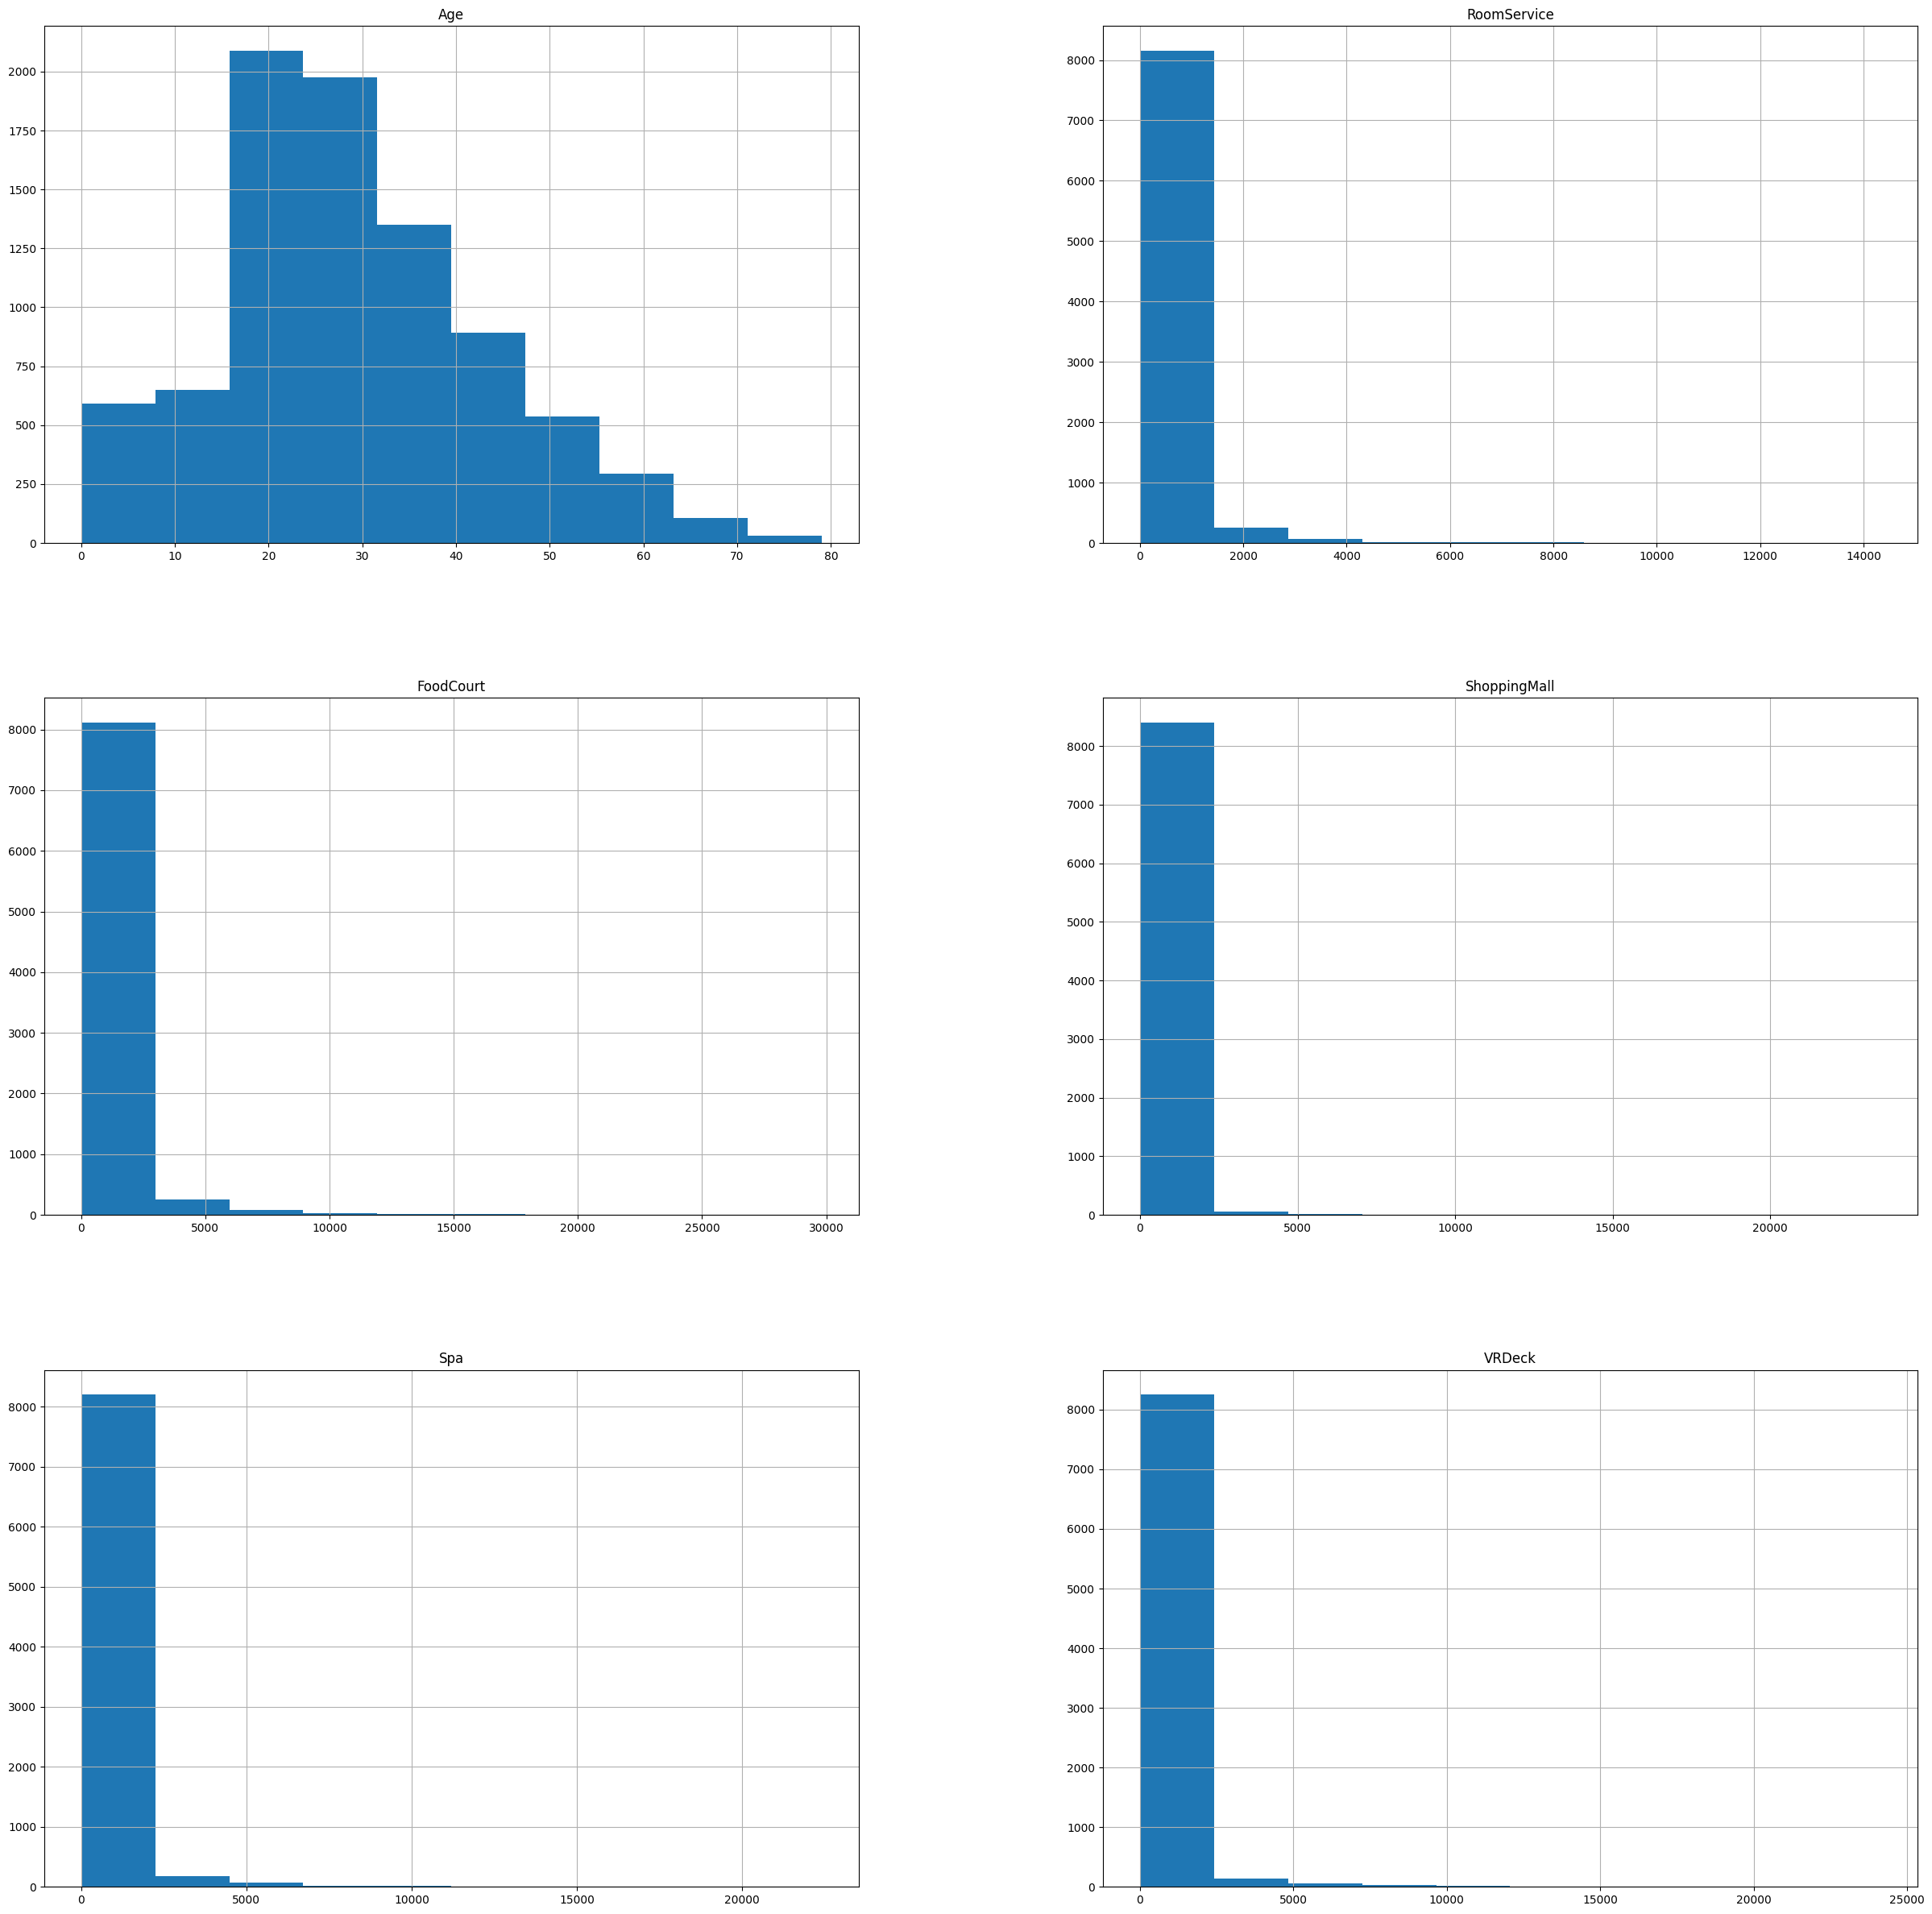

In [72]:
df.hist(figsize=(30,30))

In [73]:
# lets peek again at the df and see where we are
# we still need to do some house cleaning before we start modeling
df.head(5)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,Deckclass
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,F


In [74]:
# first lets remove the columns we know we wont be using
df.drop(columns=["PassengerId","Cabin", "Name"], inplace=True)


In [75]:
# now lets fill our nan with the mode of each column, again this is a basic approach but is an approach
values ={}
for col in df.columns:
    values.update({col: df[col].mode()[0]})
df.fillna(values, inplace=True)


In [76]:
# now convert booleans to 1 0 vs True False
# these columns in include CryoSleep, VIP, and Transported
bool_list = ["CryoSleep", "VIP", "Transported"]
for col in bool_list:
    df[col] = df[col].astype(int)

In [77]:
# now lets ordinal encode the other columns ("HomePlanet", "Destination", "Side", "Deckclass") and create the df for training
from sklearn.preprocessing import OrdinalEncoder
df_encoded= df[["HomePlanet", "Destination", "Side", "Deckclass"]].copy()
enc= OrdinalEncoder()
df_clean_training= df.join(pd.DataFrame(enc.fit_transform(df_encoded), columns=["HomePlanet", "Destination", "Side", "Deckclass"]),rsuffix="_encoded").copy()
df_clean_training.drop(columns=["HomePlanet", "Destination", "Side", "Deckclass"], inplace=True)

In [78]:
# split the feature columns from the response
features = df_clean_training.copy()
features.drop(columns=["Transported"], inplace=True)
response= df_clean_training["Transported"].to_list()

In [79]:

X_train, X_test, y_train, y_test = train_test_split(
    features, response, test_size=0.80)


In [80]:

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=50,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=50, n_estimators=1000, n_jobs=-1)

In [81]:
# Show model accuracy
y_predict = rnd_clf.predict(X_test)
accuracy_score(y_predict, y_test)

0.7981308411214953

In [82]:
def predict_test(test_file_path):
    df = pd.read_csv(test_file_path)
    df["Side"]=  df.Cabin.str.split("/").str[2]
    df["Deckclass"]=  df.Cabin.str.split("/").str[0]
    ids = df["PassengerId"].to_list()
    df.drop(columns=["PassengerId","Cabin", "Name"], inplace=True)
    values ={}
    for col in df.columns:
        values.update({col: df[col].mode()[0]})
    df.fillna(values, inplace=True)
    bool_list = ["CryoSleep", "VIP"]
    for col in bool_list:
        df[col] = df[col].astype(int)
    df_encoded= df[["HomePlanet", "Destination", "Side", "Deckclass"]]
    enc= OrdinalEncoder()
    df_clean_training= df.join(pd.DataFrame(enc.fit_transform(df_encoded), columns=["HomePlanet", "Destination", "Side", "Deckclass"]),rsuffix="_encoded").copy()
    df_clean_training.drop(columns=["HomePlanet", "Destination", "Side", "Deckclass"], inplace=True)
    # split the feature columns from the response
    features = df_clean_training.copy()
    features = features[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
        'Spa', 'VRDeck', 'HomePlanet_encoded', 'Destination_encoded',
        'Side_encoded', 'Deckclass_encoded']].copy()
    return features, ids


In [83]:
test_features, ids = predict_test(r"data/test.csv")

In [84]:
ans_predict = rnd_clf.predict(test_features)

In [85]:

pd.DataFrame({"PassengerId" : ids, "Transported" : ans_predict.astype(bool).tolist()}).to_csv("submission.csv", index=False)